# THE SPARKS FOUNDATION 

# TASK 3:- TO PERFORM EDA ON SUPERSTORE 

# BY MOHAMMED TAQIUDDIN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# LOADING THE GIVEN DATASET

In [3]:
df=pd.read_csv('SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


# To know more about data set and to Clean dataset

In [7]:
df.shape

(9994, 13)

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
df.duplicated().sum()

17

In [10]:
df.drop_duplicates(subset=None,keep= 'first',inplace=True)

In [11]:
df['Postal Code']=df['Postal Code'].astype('object')

In [12]:
df.duplicated().sum()

0

In [14]:
# unique values in every column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Analysing the data

In [15]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Checking which catagory mostly used 

In [16]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

Checking which class is mostly used in regards to SHIP MODE

In [17]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

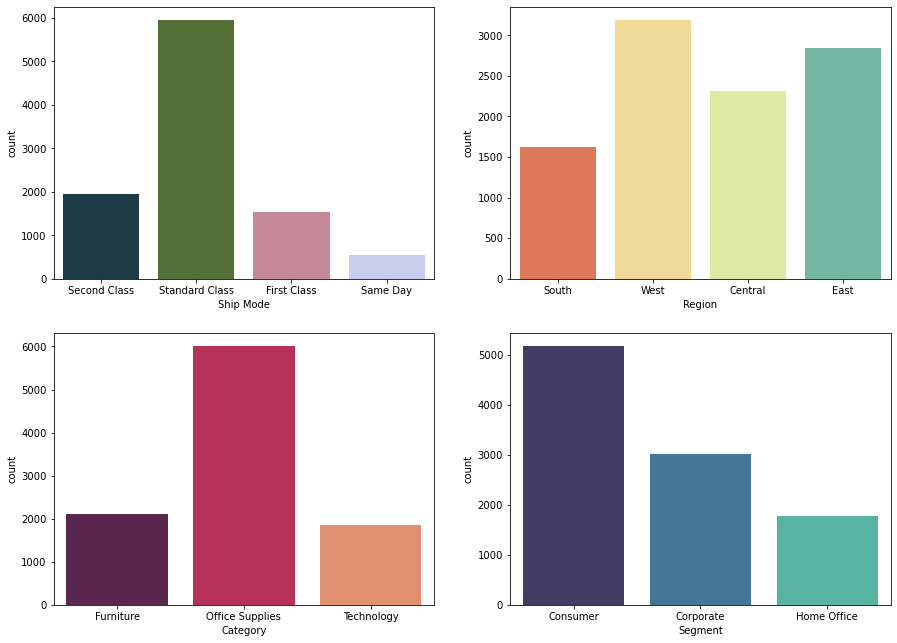

In [18]:
fig, axs = plt.subplots(2,2, figsize = (15,11))
sns.countplot(x = df['Ship Mode'], ax = axs[0,0], data = df,palette = 'cubehelix')
sns.countplot(x = df['Region'], ax = axs[0,1], data = df,palette = 'Spectral')
sns.countplot(x = df['Category'],data = df, ax = axs[1,0], palette = 'rocket')
sns.countplot(x = df['Segment'], ax = axs[1,1], data = df,palette = 'mako')

    1.From this first plot,most byuers prefer Standard Class. 
    2.From the second plot,  West Region has the highest number of sales.
    3.From the third plot , Office Supplies Product category has the most sold section
    4.and From the forth plot, we understand that the Consumer segment goods were the most sold


# To check which state in the US has the highest number of sales.

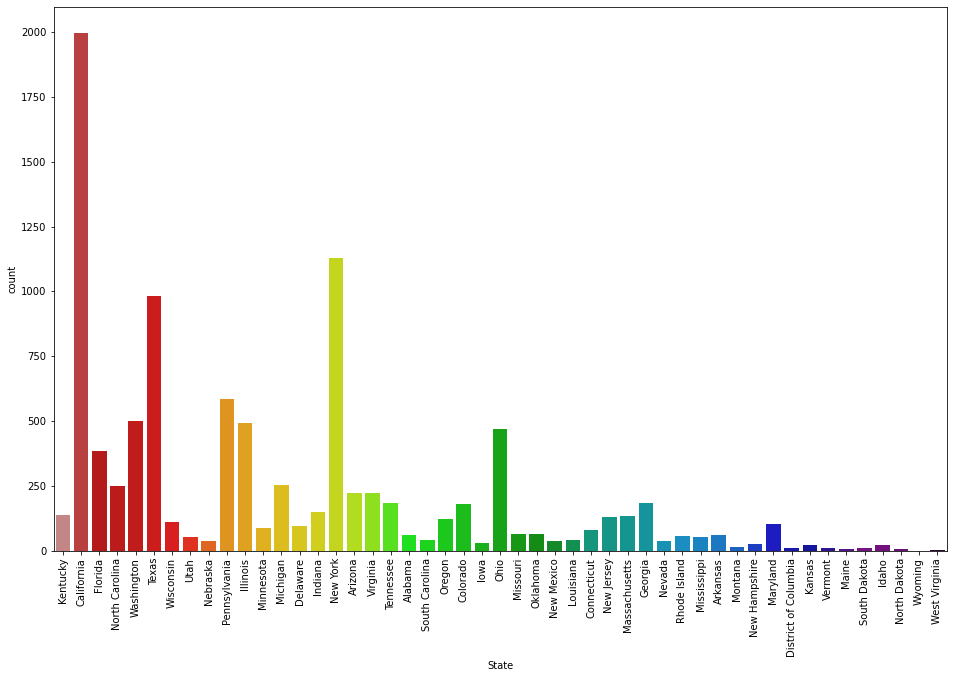

In [20]:
plt.figure(figsize= (16,10))
sns.countplot(x = df['State'],data = df,palette =  'nipy_spectral_r')
plt.xticks(rotation=90)
plt.show()

As we can see From the above plot it can be concluded that California has highest number of sales, followed by New York and then Texas.

Text(0.5, 1.0, ' Most Sales to Profit for first 30 states')

<Figure size 8640x10800 with 0 Axes>

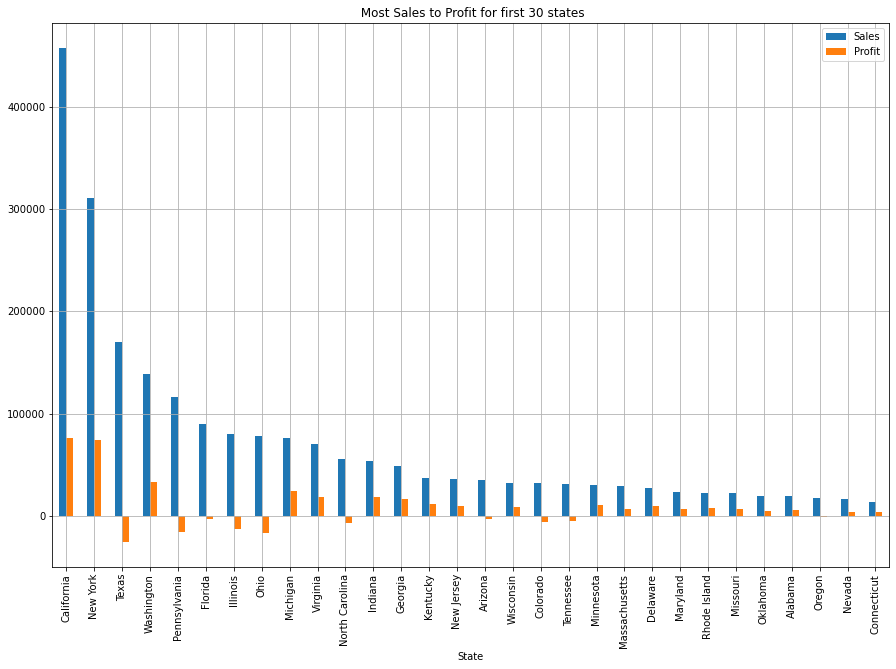

In [60]:
s=df.groupby('State')[["Sales","Profit"]].sum().sort_values(by="Sales",ascending=False)
plt.figure(figsize=(120,150))
s[:30].plot(kind='bar',figsize=(15,10))
plt.grid(True)
plt.title(' Most Sales to Profit for first 30 states')

# Product Analysis

In [22]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [23]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

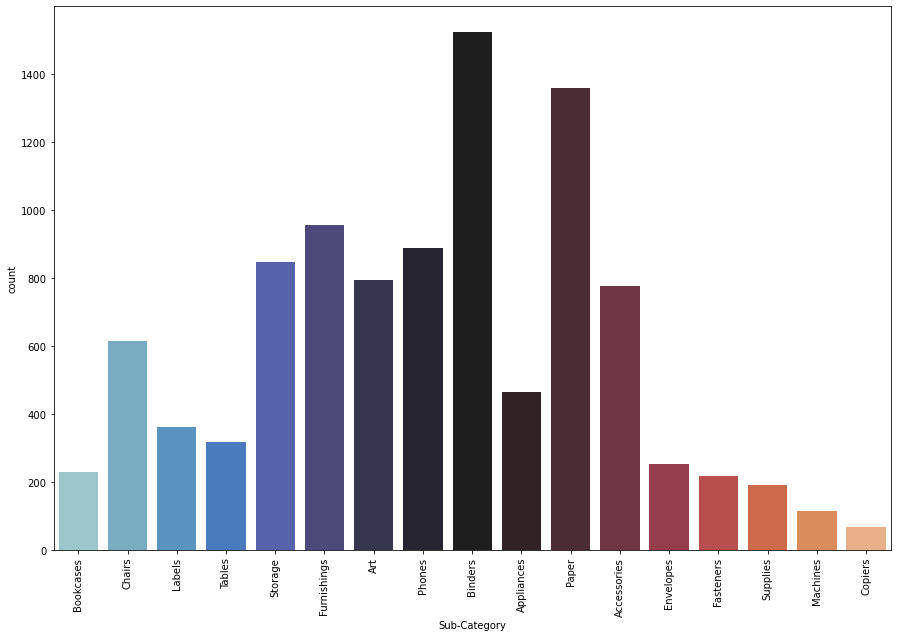

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(x = df['Sub-Category'],data = df, palette =  'icefire')
plt.xticks(rotation = 90)
plt.show()

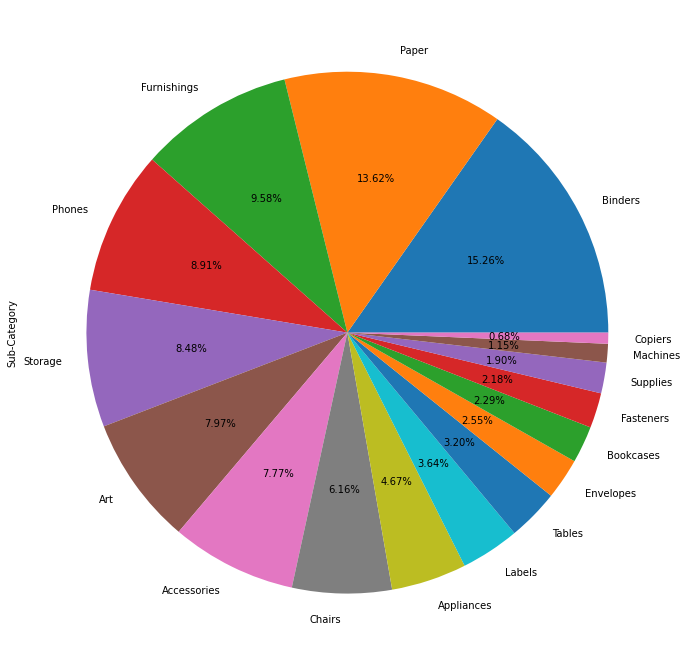

In [27]:
p1 = df['Sub-Category'].value_counts()
p1.plot.pie(autopct='%1.2f%%',figsize = (12,12))

 Binder and paper has more demand and that why overall Office supplies has more demand

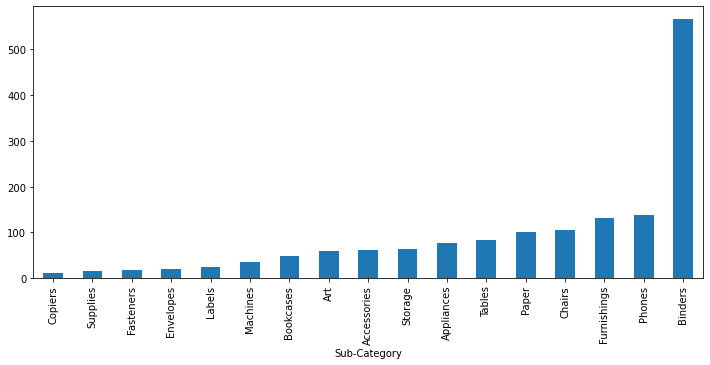

In [34]:
df.groupby('Sub-Category').sum()['Discount'].sort_values(ascending=True).plot.bar(figsize=(12,5))
plt.show()

More discount was given in binder that may be reason to increase sell of binder.

# Analysing Categories to Sale and Profit

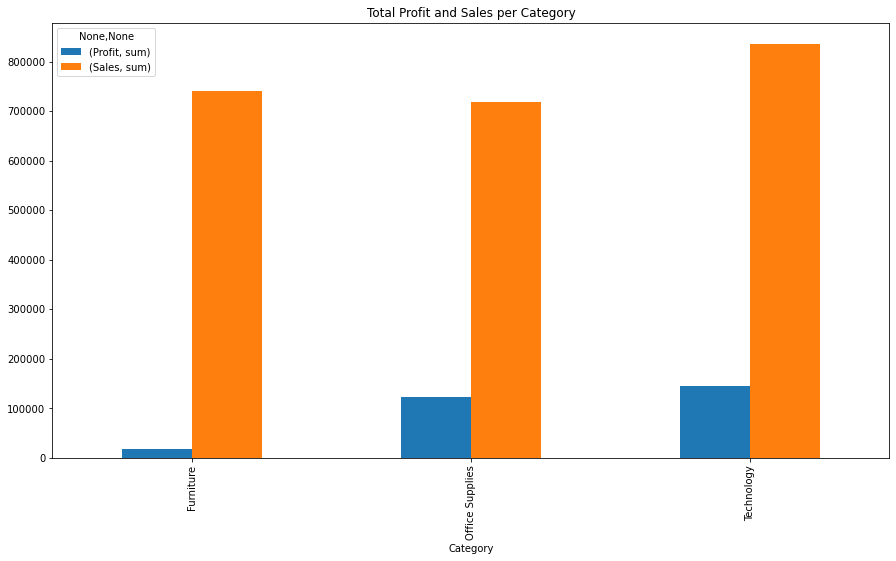

In [33]:
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(15,8))
plt.title('Total Profit and Sales per Category')
plt.show()

As we can see that Technology section has very good profit and sales when compared to furniture section which has very less profit although it has good sales.



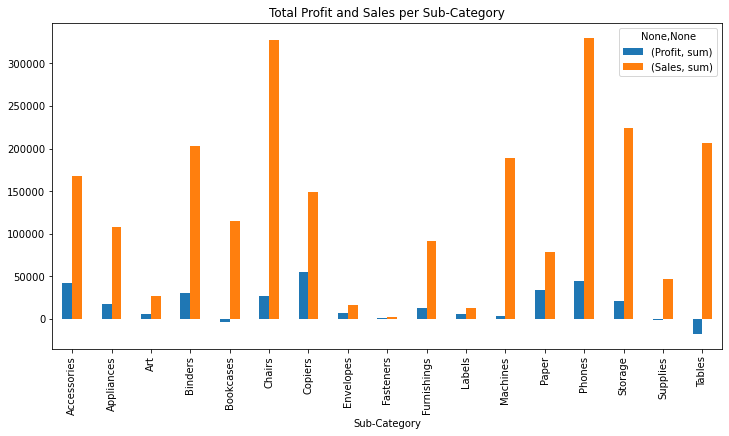

In [37]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize = (12,6))
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

 Above we can see that Copiers, Phones, Paper and accessories gives more profit than others and We can also see that there is loss in selling Tables and Bookcases.

# Analysing by regions 

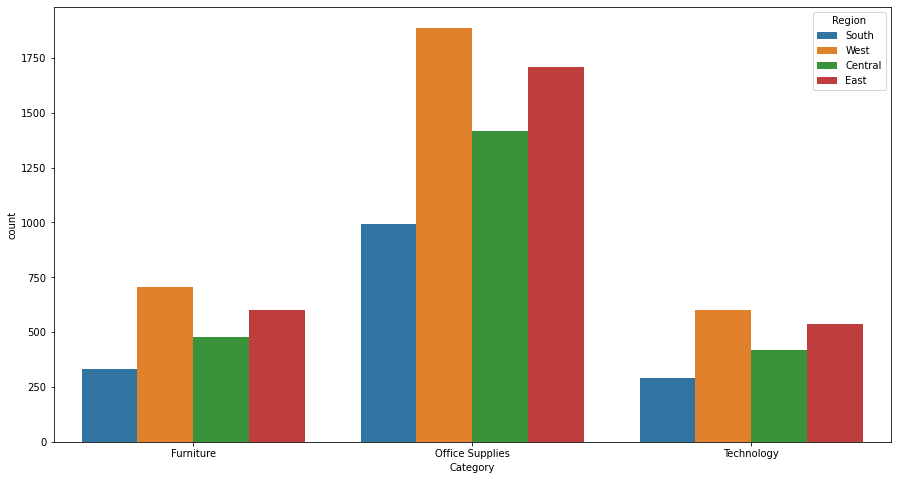

In [51]:
plt.figure(figsize=(15,8))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

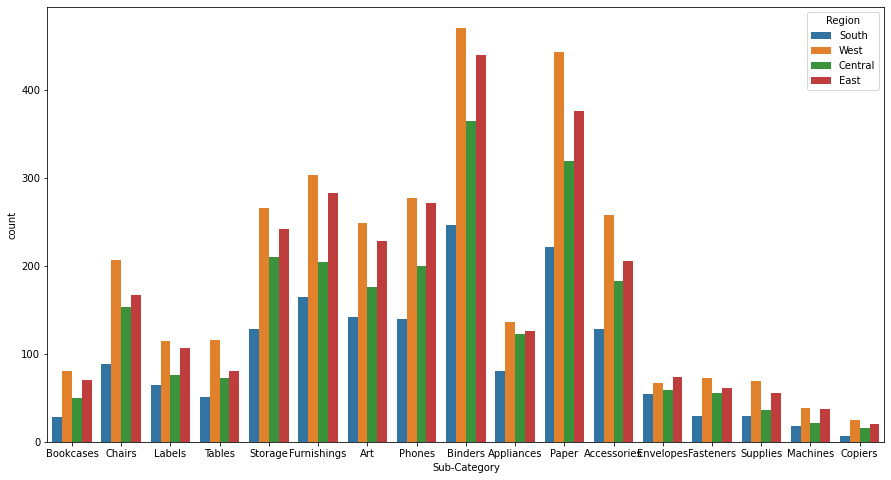

In [44]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

# Checking which state has the highest profit.

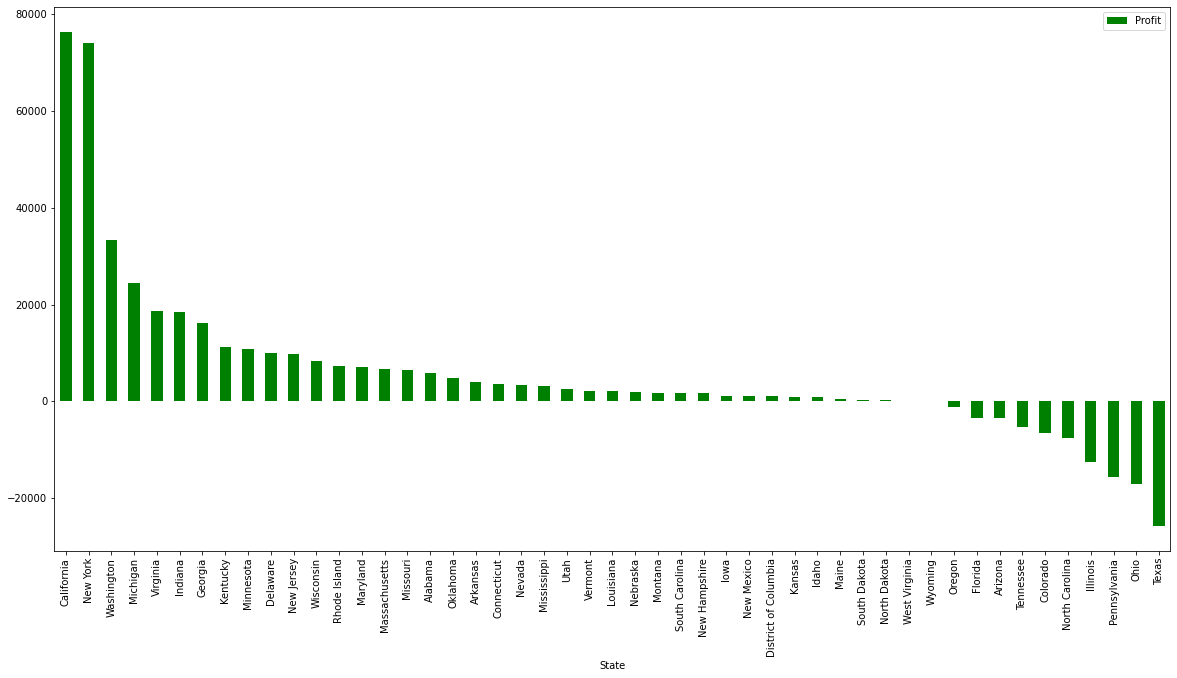

In [48]:
v = df.groupby(["State"])[['Profit']].sum()
m = v.sort_values(by = 'Profit',ascending = False)
m.plot(kind = 'bar',figsize = (20,10), color = 'green')
plt.xticks(rotation = 90)
plt.show()

 From the above plot California witnessed the highest profit

check which region has the highest profit share.

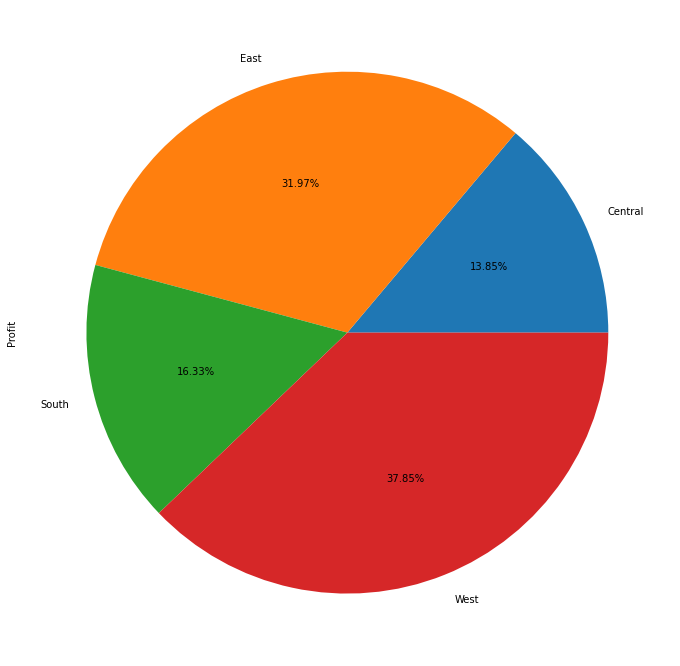

In [54]:
p3 = df.groupby('Region').sum()['Profit']
p3.plot.pie(autopct='%1.2f%%',figsize = (12,12))

# Analysing Loss in the Store

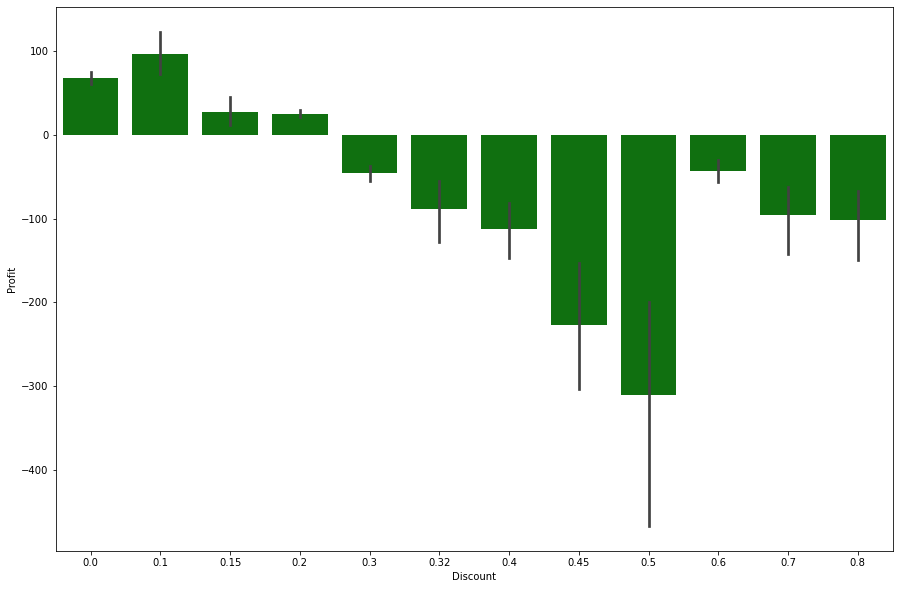

In [56]:
plt.figure(figsize=(15,10))
sns.barplot('Discount', 'Profit', data = df, color = 'g', label= 'Discount')

From the above graph we can see that is store facing loss 

PLOTTING THE CORRELATION FROM THE DATSET

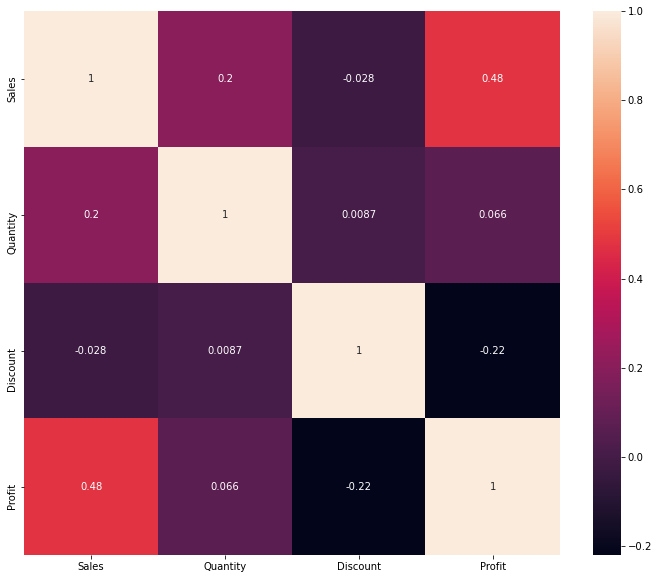

In [59]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot=True)

Here we can clearly understand that there is a positive correlation between Profit and sales i.e when sales increases profit also increases. we can also observe a negative correlation between Profit and discount.

# FINAL OBSERVATION AND ANALYSIS
    1.The profit is very high when the ship mode is Standard class.
    2.The profit is more from the east and west region of the country.
    3.Top 3 Profitable States:- California>New York>Washington.
    4.Top 3 sold product sub category are:- Blinders>Paper>Furnishings.
    5.Top 3 states with loss:- Texas>Ohio>Pennsylvania.
    6.Copiers have most profit with less sale where as Tables are at loss.

# SUGGESTIONS :
    1.Negative correlation is seen .Greater discount is leading to more loss. So, discount value should be decreased.
    2.The Discount should not decrease below 0.3.
    3.The store should focus on improving profit in Central and Eastern region of USA.
    4.The Store should give more focus on Technology sector and the quality of the tables should be improved or 
      they need to remove it completly.
    5.Home Office and Corporate segments are two areas where the store can also focus on to improve sales and profit.